# Python for data analysis

In this notebook we show how to use Python/pandas to load data stored in comma separated value (CSV) format. The data are stored on the web - they represent the GDP (gross domestic product) of each country in the world for a number of years. 

We want to find out which are the richest countries and how the wealth of New Zealand increased in the past years compared to Australia.

The steps are the following:

 * read the data
 * select the countries that have a GDP larger than USD 50,000
 

In [1]:
# Access the pandas package to do data analysis. 
# A package is a set of tools designed to fulfil specific tasks, in this case data analysis.
# All pandas functions X (for instance read_csv) will have to be access as "pandas.X"
import pandas

# the data are on web, we'll fetch them and read them in one command. Note that the command may take a few seconds 
# to execute... We call the data "data", but we could call them anything we want.
url = 'http://manage.hdx.rwlabs.org/hdx/api/exporter/indicator/csv/PSE030/source/world-bank/fromYear/1950/toYear/0/language/en/PSE030_Baseline.csv'
data = pandas.read_csv(url)


In [4]:
# A good way to check what's inside. The years span from 1980 to 2013. NaN refers to not-a-number or missing value. 
data.head()


,Country code,Country name,2013,2012,2011,2010,2009,2008,2007,2006,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,ABW,ARUBA,NaN,NaN,36016.483757,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,AFGHANISTAN,1946.193806,1927.138767,1695.153436,1604.191457,1497.884256,1258.739944,1222.764099,1076.461378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,ANGOLA,7736.174682,7360.598595,7094.084302,6904.562607,6813.103048,6821.202994,6079.390171,4996.766535,...,2220.008106,2185.987078,2049.995372,1893.418283,1852.653900,NaN,NaN,NaN,NaN,NaN
3,ALB,ALBANIA,9930.943226,9666.728238,9640.130216,9297.492753,9345.093762,8769.117670,7659.173527,7181.094192,...,2907.447872,2603.009290,2618.290977,2636.355222,2507.940163,2452.070866,2451.231704,2386.304685,2235.225563,1978.272001
4,ARE,UNITED ARAB EMIRATES,NaN,59845.256817,56376.769923,55764.873251,59291.103838,70133.152975,78193.619487,87766.147264,...,45794.509345,41676.568915,43933.739790,43829.675785,53393.942593,56685.289105,55199.496976,58620.029648,62769.494553,58933.465467


In [7]:
# Each column has a name. Names are represented as characters inside quotes. The u in front of each string
# indicates unicode, which allows you to represent accent and other foreign characters (no need to worry about this).
data.columns 


Index([u'Country code', u'Country name', u'2013', u'2012', u'2011', u'2010',
       u'2009', u'2008', u'2007', u'2006', u'2005', u'2004', u'2003', u'2002',
       u'2001', u'2000', u'1999', u'1998', u'1997', u'1996', u'1995', u'1994',
       u'1993', u'1992', u'1991', u'1990', u'1989', u'1988', u'1987', u'1986',
       u'1985', u'1984', u'1983', u'1982', u'1981', u'1980'],
      dtype='object')

In [8]:
# We can access a subset of the data. If we say data['2013'] then this will show all the GDPs for the year 2013. 
print(data['2013'])

0               NaN
1       1946.193806
2       7736.174682
3       9930.943226
4               NaN
5               NaN
6       7776.286043
7      21027.826640
8      43202.367688
9      45079.092211
10     17143.109665
11       771.715430
12     41574.756309
13      1790.753637
14      1684.479651
15      2948.014890
16     15731.672624
17     43850.939718
18     23264.272211
19      9535.539791
20     17619.769656
21      8486.898540
22              NaN
23      6131.061689
24     15037.457469
25              NaN
26     71776.648012
27      7404.736784
28     15751.902206
29       603.742960
           ...     
161    44658.231787
162     6685.338117
163    24587.485595
164             NaN
165     2088.591836
166     1390.519711
167    14393.530704
168     2512.247566
169    14004.160057
170     2241.887680
171     5304.206689
172    30446.007539
173    11124.496009
174    18782.845752
175     3645.157930
176     2443.072231
177     1674.285069
178     8789.982001
179    19594.369561


In [11]:
# This is where things get interesting. We want to create a new table called richCountries that contains
# only the countries that have a GDP > 50,000. To do so we need to select all the rows of the table where the
# '2013' column has a number larger than 50000. data.loc[...] means get the rows that 
richCountries = data.loc[ data['2013'] > 50000 ]
print(richCountries)


    Country code       Country name           2013           2012  \
26           BRN  BRUNEI DARUSSALAM   71776.648012   72953.867981   
31           CHE        SWITZERLAND   56950.024339   55915.499995   
73           HKG          HONG KONG   53215.937373   51176.192575   
105          LUX          LUXEMBURG   91047.588883   91849.920215   
107          MAC              MACAU  142599.240319  127742.698900   
129          NOR             NORWAY   64405.712221   65103.698037   
144          QAT              QATAR  136727.253610  134289.773572   
148          SAU       SAUDI ARABIA   53644.126925   52042.469058   
151          SGP          SINGAPORE   78763.384944   75951.670486   
180          USA      UNITED STATES   53041.981406   51495.874845   

              2011           2010           2009           2008  \
26    71991.084985   69208.221059   67680.421821   69481.850420   
31    54550.689366   51321.509695   49919.243232   50438.762948   
73    50086.037004   47147.914379   439

richCountriesSorted = richCountries.sort_values(by='2013', ascending=False)
print(richCountriesSorted)

In [14]:
for row in richCountriesSorted.iterrows():
    print(row[1]['Country name'], row[1]['2013'])

MACAU 142599.240319212
QATAR 136727.25361016698
LUXEMBURG 91047.5888834933
SINGAPORE 78763.3849443771
BRUNEI DARUSSALAM 71776.6480123078
NORWAY 64405.7122213084
SWITZERLAND 56950.02433891941
SAUDI ARABIA 53644.126925009805
HONG KONG 53215.9373734741
UNITED STATES 53041.98140556231


In [22]:
print('{0:20s}\t\t\t{1:s}'.format('Country', 'GDP per capita US $'))
print('='*50)
for row in richCountriesSorted.iterrows():
    str = '{0:20s}\t\t\t{1:10.0f}'.format(row[1]['Country name'], row[1]['2013'])
    print(str)

Country             			GDP per capita US $
MACAU               			    142599
QATAR               			    136727
LUXEMBURG           			     91048
SINGAPORE           			     78763
BRUNEI DARUSSALAM   			     71777
NORWAY              			     64406
SWITZERLAND         			     56950
SAUDI ARABIA        			     53644
HONG KONG           			     53216
UNITED STATES       			     53042


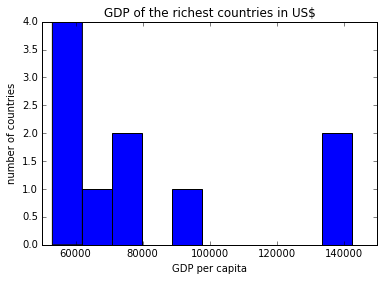

In [24]:
%matplotlib inline
from matplotlib import pyplot
pyplot.hist(richCountriesSorted['2013'])
pyplot.title('GDP of the richest countries in US$')
pyplot.xlabel('GDP per capita')
pyplot.ylabel('number of countries')

years =  ['2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980']
GDPs =  [ 34731.56906569  32425.33910701  31836.65912456  30640.0282309
  30114.32438695  29229.04382102  28866.47408065  27362.47889177
  25469.08366219  24827.57316319  23740.96252966  23094.04534709
  22308.46962188  21316.96727571  20374.17021471  19076.95448416
  18854.42258515  18145.433915    17623.03443525  16776.12774633
  15665.54555255  14695.21139939  14323.21453405  14697.59747363
  14318.50623916  13768.61775569  13198.48032214  12875.62426943
  12330.89567227  11946.66682361  11068.40241521  10506.7662605
   9590.98429094   8526.03811314]


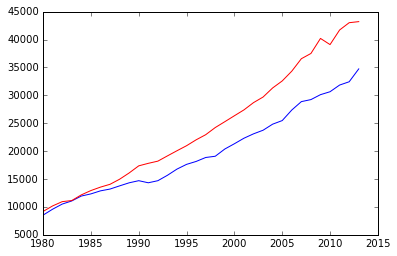

In [37]:
nzGDP = data[ data['Country name'] == 'NEW ZEALAND' ]
ozGDP = data[ data['Country name'] == 'AUSTRALIA' ]
years = []
for c in nzGDP.columns: 
    if c[0] == '2' or c[0] == '1':
        years.append(c)
print('years = ', years)
import numpy
nzgdp = numpy.array(nzGDP[years])[0]
ozgdp = numpy.array(ozGDP[years])[0]
print('GDPs = ', gdp)
pyplot.plot(years, nzgdp, 'b-', years, ozgdp, 'r-')

In [34]:
growthPerCent = 100 * (- gdp[1:] + gdp[:-1])/gdp[1:]
print(growthPerCent)


[ 7.11243127  1.84906331  3.90544971  1.74569363  3.02877019  1.25602365
  5.49656044  7.43409247  2.58386309  4.57694431  2.80122938  3.52142365
  4.65123548]


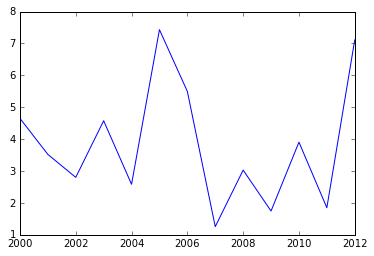

In [35]:
pyplot.plot(years[1:], growthPerCent)